<a href="https://colab.research.google.com/github/AgustinGurvich/TMD/blob/main/TMD_TP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



 sp      sex         index            FL              RW              CL       
 B:100   F:100   Min.   : 1.0   Min.   : 7.20   Min.   : 6.50   Min.   :14.70  
 O:100   M:100   1st Qu.:13.0   1st Qu.:12.90   1st Qu.:11.00   1st Qu.:27.27  
                 Median :25.5   Median :15.55   Median :12.80   Median :32.10  
                 Mean   :25.5   Mean   :15.58   Mean   :12.74   Mean   :32.11  
                 3rd Qu.:38.0   3rd Qu.:18.05   3rd Qu.:14.30   3rd Qu.:37.23  
                 Max.   :50.0   Max.   :23.10   Max.   :20.20   Max.   :47.60  
       CW              BD       
 Min.   :17.10   Min.   : 6.10  
 1st Qu.:31.50   1st Qu.:11.40  
 Median :36.80   Median :13.90  
 Mean   :36.41   Mean   :14.03  
 3rd Qu.:42.00   3rd Qu.:16.60  
 Max.   :54.60   Max.   :21.60  

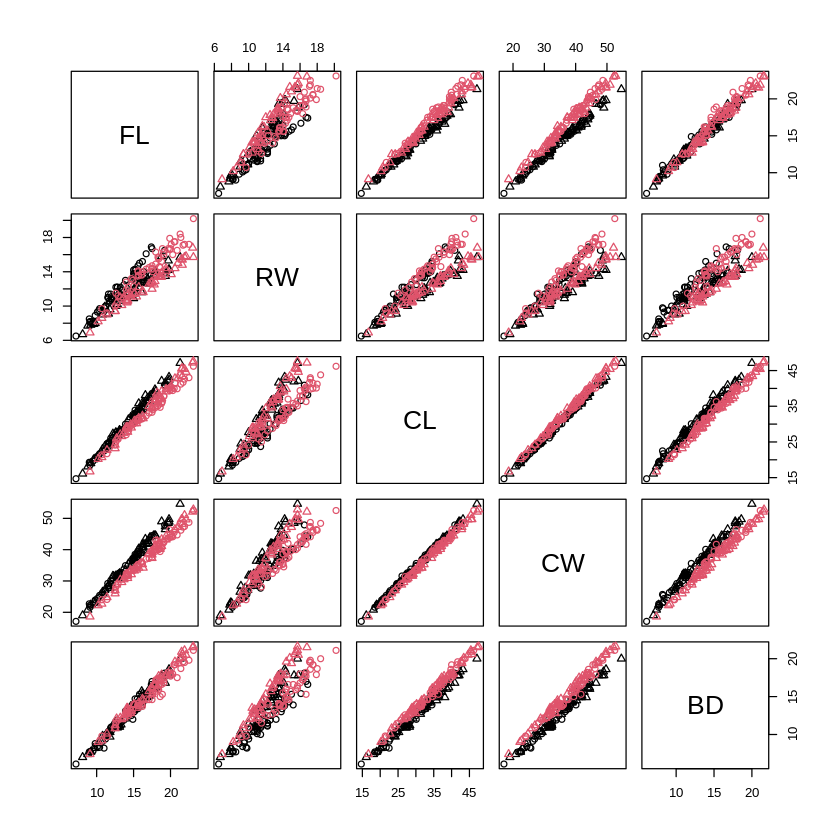

In [45]:
library(MASS)
install.packages("e1071") 
library(e1071)
data(crabs)
summary(crabs)
plot(crabs[,4:8],col=as.numeric(crabs[,1]),pch=as.numeric(crabs[,2]))
crabs.vars <- crabs[,4:8] #Sacamos las variables para usarlas

In [71]:
check.cluster <- function(base,cc){
  cont.table <- table(base,cc)
  class.match <- matchClasses(as.matrix(cont.table),method="exact")
  print(cont.table[,class.match])
}

Cluster sin hacer nada con los datos, evidentemente no funciona

In [72]:
cc <- kmeans(crabs.vars,cent=2)

check.cluster(crabs$sp,cc$cluster)
check.cluster(crabs$sex,cc$cluster)

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 57.5 %
    cc
base  2  1
   B 54 46
   O 39 61
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 50.5 %
    cc
base  1  2
   F 54 46
   M 53 47


Cluster aplicando escala logaritmica a todos los datos, no se ven mejoras en el proceso

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 60.5 %
    cc
base  2  1
   B 48 52
   O 27 73
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 51.5 %
    cc
base  1  2
   F 64 36
   M 61 39


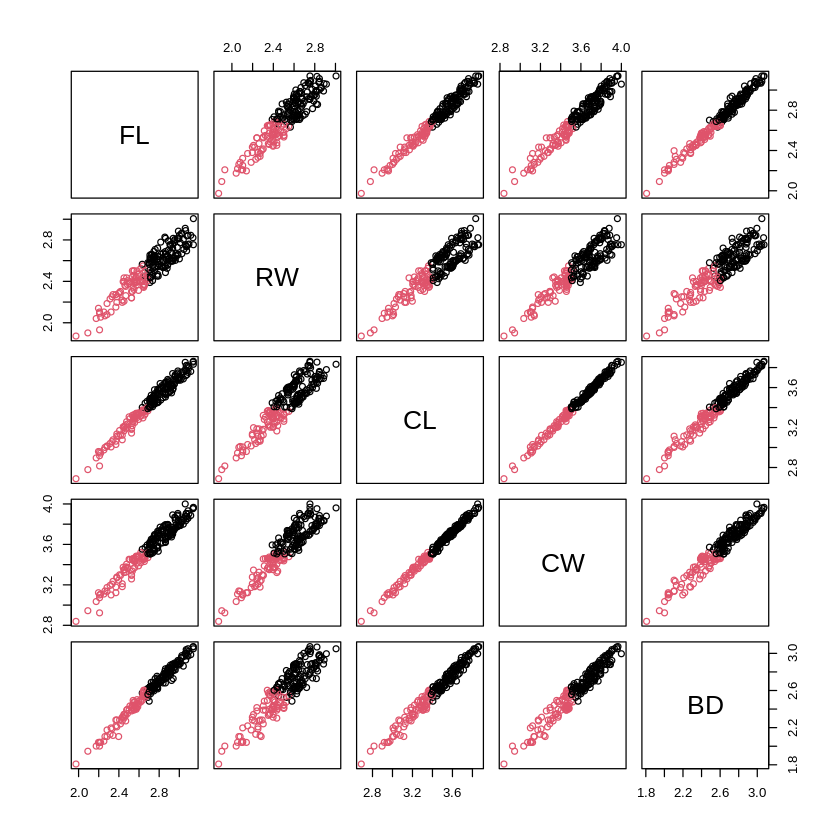

In [73]:
crabs.vars.log <- log(crabs.vars)
cc <- kmeans(crabs.vars.log,cent=2)
plot(crabs.vars.log, col = cc$cluster)
check.cluster(crabs$sp,cc$cluster)
check.cluster(crabs$sex,cc$cluster)

Escalamos las variables

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 60.5 %
    cc
base  2  1
   B 48 52
   O 27 73
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 51.5 %
    cc
base  1  2
   F 64 36
   M 61 39


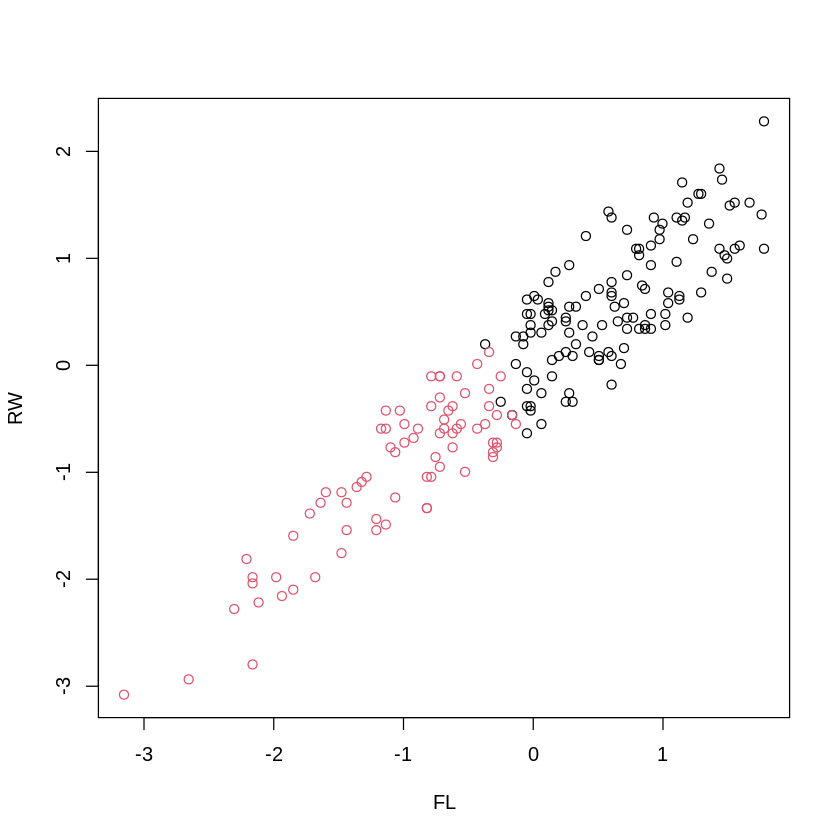

In [74]:
crabs.vars.log.scale <- scale(crabs.vars.log)
cc <- kmeans(crabs.vars.log.scale,cent=2)
plot(crabs.vars.log.scale, col = cc$cluster)
check.cluster(crabs$sp,cc$cluster)
check.cluster(crabs$sex,cc$cluster)

Aplicamos PCA para buscar las mejores variables

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 60.5 %
    cc
base  2  1
   B 48 52
   O 27 73
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 51.5 %
    cc
base  1  2
   F 64 36
   M 61 39


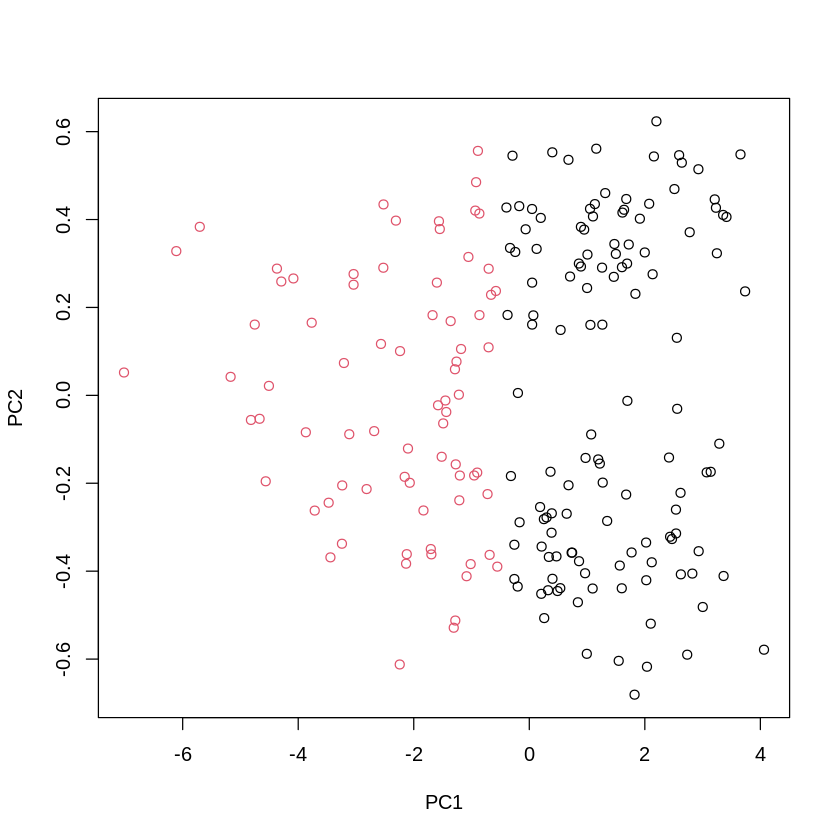

In [75]:
crabs.vars.log.pca <- prcomp(crabs.vars.log.scale)
cc <- kmeans(crabs.vars.log.pca$x,cent=2)
plot(crabs.vars.log.pca$x, col = cc$cluster)
check.cluster(crabs$sp,cc$cluster)
check.cluster(crabs$sex,cc$cluster)

Me parecio que no funcionaban bien los métodos secuenciales, así que se me ocurrió ir jugando de a partes. Como no podía ver bien los plots de la PCA, empecé a graficar las combinaciones de las 3 más importantes.

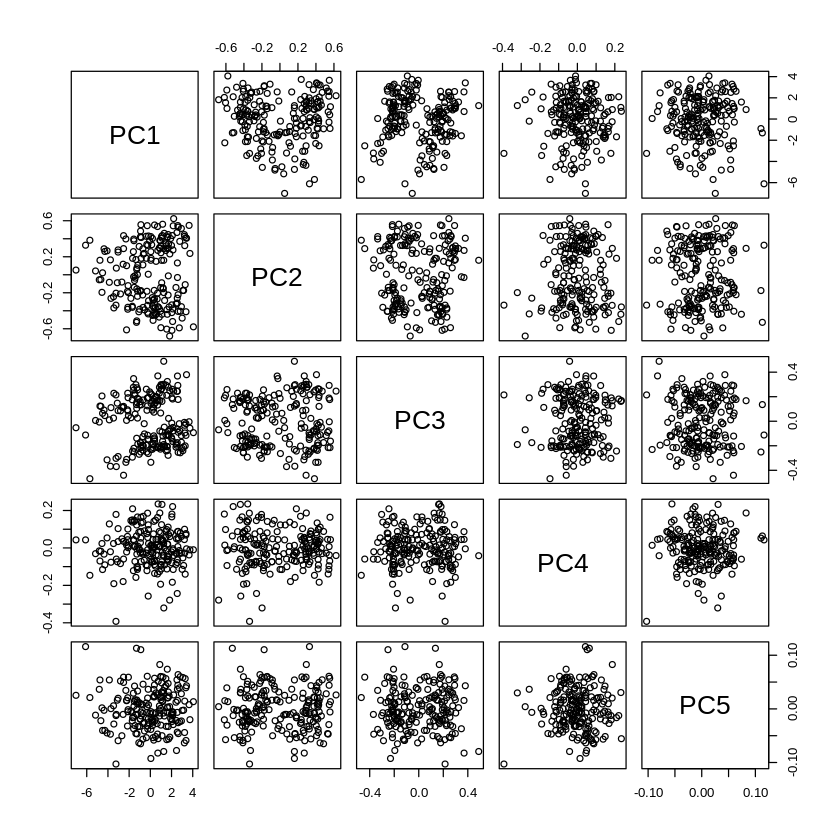

In [142]:
pairs(crabs.vars.log.pca$x)

Esto funciono para encontrar las especies con altísima precisión

Direct agreement: 2 of 2 pairs
Cases in matched pairs: 99.5 %
    cc
base   1   2
   B 100   0
   O   1  99
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 50.5 %
    cc
base  2  1
   F 50 50
   M 49 51


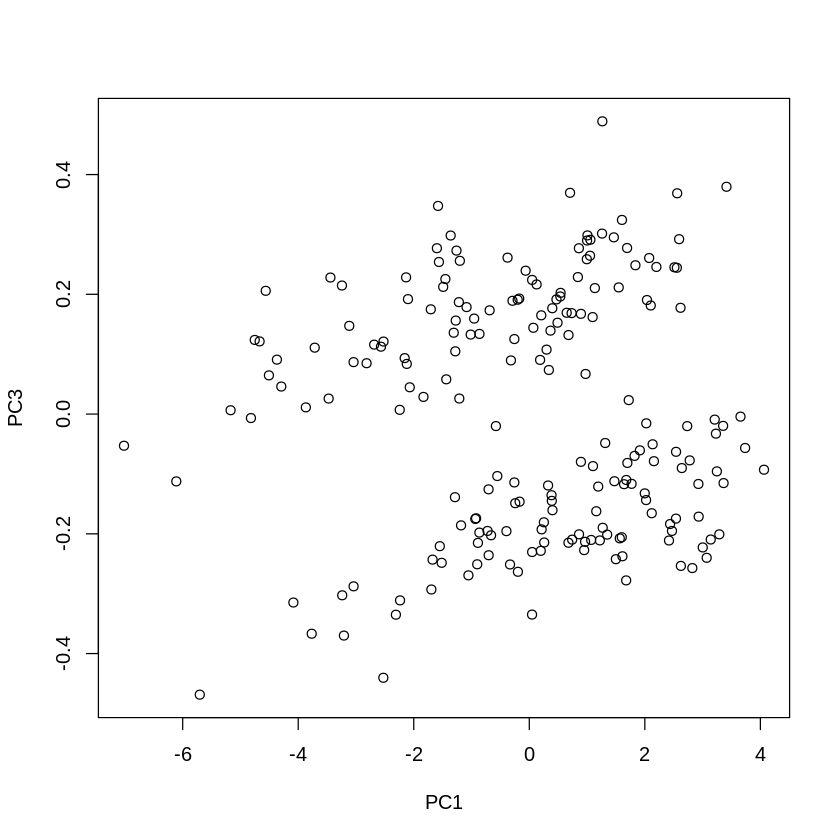

In [76]:
c <- scale(log(crabs.vars))
c2 <- prcomp(c)
plot(c2$x[,c(1,3)])
cosa <- c2$x[,c(1,3)]
cosa <- scale(cosa)
cc <- kmeans(cosa,cent=2)
check.cluster(crabs$sp,cc$cluster)
check.cluster(crabs$sex,cc$cluster)

Y esto para los sexos

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 55.5 %
    cc
base  1  2
   B 59 41
   O 48 52
Direct agreement: 2 of 2 pairs
Cases in matched pairs: 94.5 %
    cc
base  1  2
   F 98  2
   M  9 91


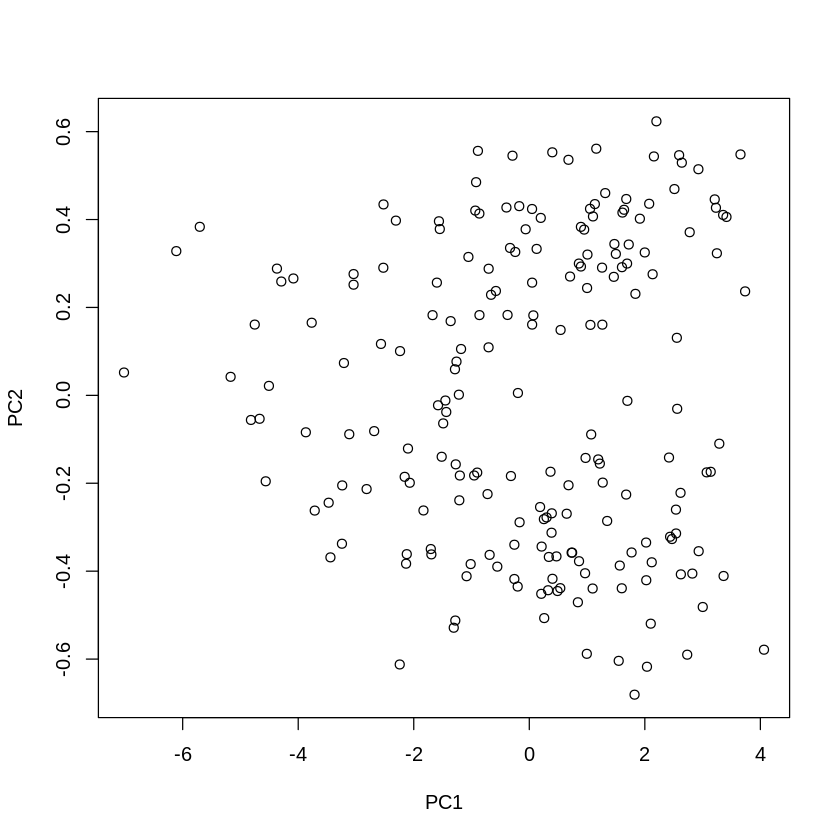

In [77]:
c <- scale(log(crabs.vars))
c2 <- prcomp(c)
plot(c2$x[,c(1,2)])
cosa <- c2$x[,c(1,2)]
cosa <- scale(cosa)
cc <- kmeans(cosa,cent=2)
check.cluster(crabs$sp,cc$cluster)
check.cluster(crabs$sex,cc$cluster)

In [55]:
c <- scale(log(crabs.vars))
c2 <- prcomp(c)
cosa <- c2$x
cosa <- scale(cosa)
cc <- hclust(dist(cosa))
# plot(cc)
# check.clusterh.sp(cc)
# check.cluster.sex(cc)

Ahora analizamos Lampone

In [68]:
load("lampone.Rdata", verbose = T)
summary(lampone)

Loading objects:
  lampone


   anno         m33              m34              m35             m36         
 2006:19   Min.   : 13.31   Min.   :0.1600   Min.   :0.020   Min.   :0.00000  
 2007:30   1st Qu.: 37.70   1st Qu.:0.3900   1st Qu.:0.060   1st Qu.:0.01000  
           Median : 63.97   Median :0.6500   Median :0.110   Median :0.01000  
           Mean   : 69.47   Mean   :0.7751   Mean   :0.132   Mean   :0.01143  
           3rd Qu.: 80.30   3rd Qu.:0.9800   3rd Qu.:0.170   3rd Qu.:0.01000  
           Max.   :255.31   Max.   :2.9500   Max.   :0.540   Max.   :0.02000  
                                                                              
      m40         m41              m42               m43       
 Min.   :0   Min.   :0.0600   Min.   :0.01000   Min.   : 1.49  
 1st Qu.:0   1st Qu.:0.1400   1st Qu.:0.02000   1st Qu.: 5.45  
 Median :0   Median :0.2500   Median :0.03000   Median :10.42  
 Mean   :0   Mean   :0.2818   Mean   :0.03449   Mean   :15.09  
 3rd Qu.:0   3rd Qu.:0.3700   3rd Qu.:0.04000   

In [88]:
print(lampone[,c(1,143)])

    anno N_tipo
11  2006      2
12  2006      2
13  2006      2
14  2006      2
15  2006      2
16  2006      2
17  2006      2
18  2006      2
19  2006      2
96  2006     10
97  2006     10
98  2006     10
99  2006     10
100 2006     10
101 2006     10
102 2006     10
103 2006     10
104 2006     10
105 2006     10
152 2007      2
153 2007      2
154 2007      2
155 2007      2
156 2007      2
157 2007      2
158 2007      2
159 2007      2
160 2007      2
161 2007      2
162 2007      2
163 2007      2
164 2007      2
276 2007     10
277 2007     10
278 2007     10
279 2007     10
280 2007     10
281 2007     10
282 2007     10
283 2007     10
284 2007     10
285 2007     10
286 2007     10
287 2007     10
288 2007     10
289 2007     10
290 2007     10
291 2007     10
292 2007     10


Vemos que hay 2 años y 2 tipos de blueberry usadas, por lo que en general estaremos buscando 2 clusters

Sacamos las variables para trabajar sin problemas

In [91]:
lampone.vars <- lampone[,-c(1,143,144)] #Sacamos la variable 144 porque no es continua y hace explotar todo

Hacemos un kmeans sin nada, parece que ya de por sí es muy bueno para encontrar clusters del año pero no tanto para el tipo de blueberry

In [97]:
cc <- kmeans(lampone.vars,cent=2)

check.cluster(lampone$anno,cc$cluster)
check.cluster(lampone$N_tipo,cc$cluster)

Direct agreement: 2 of 2 pairs
Cases in matched pairs: 91.84 %
      cc
base    1  2
  2006 17  2
  2007  2 28
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 57.14 %
    cc
base  1  2
  2  10 12
  10  9 18


No puedo aplicar una transformacion logaritmica porque hay valores en 0 y scale me deja cosas en nan. Toca hacer primero una PCA.

No mejoro nada, volvamos a ver relaciones entre elementos de la PCA.

In [113]:
lampone.vars.pca <- prcomp(lampone.vars)
cc <- kmeans(lampone.vars.pca$x,cent=2)

check.cluster(lampone$anno,cc$cluster)
check.cluster(lampone$N_tipo,cc$cluster)

Direct agreement: 2 of 2 pairs
Cases in matched pairs: 91.84 %
      cc
base    1  2
  2006 17  2
  2007  2 28
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 57.14 %
    cc
base  1  2
  2  10 12
  10  9 18


Veamos las 6 primeras variable importantes (porque son demasiadas) de a pares. No parecen ayudar mucho.

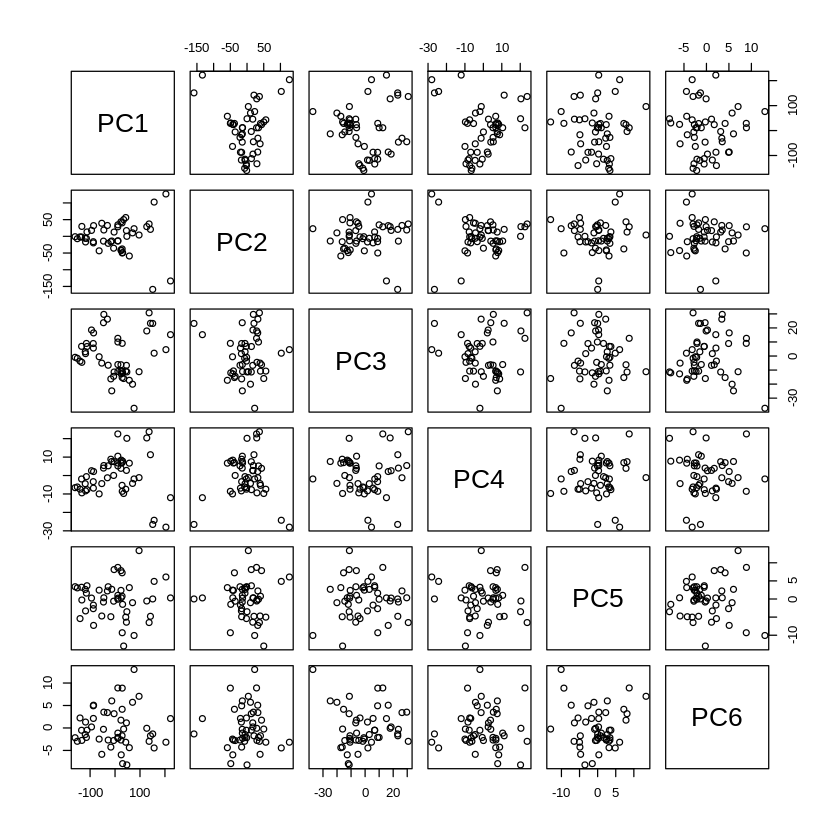

In [137]:
pairs(lampone.vars.pca$x[,1:6])

In [152]:
lampone.vars.pca.scale <- scale(lampone.vars.pca$x)
cc <- kmeans(lampone.vars.pca.scale[,c(1,3)],cent=2)
# cc <- kmeans(lampone.vars.pca.scale[,c(1,2,3,4,5,6,7,8)],cent=2)

check.cluster(lampone$anno,cc$cluster)
check.cluster(lampone$N_tipo,cc$cluster)

Direct agreement: 2 of 2 pairs
Cases in matched pairs: 89.8 %
      cc
base    2  1
  2006 17  2
  2007  3 27
Direct agreement: 1 of 2 pairs
Iterations for permutation matching: 1 
Cases in matched pairs: 63.27 %
    cc
base  2  1
  2  12 10
  10  8 19


No parece que sea sencillo encontrar clusters. Con kmeans me doy cuenta que quizás usando las variables 1 y 3 obtenemos buenos resultados, pero no tan buenos como usando todas las variables sin modificar.

Funciones auxiliares para los métodos de clustering

In [179]:
crea.referencias <- function(original.dataset, n){
    #Dimensiones del dataset
    rows <- dim(original.dataset)[1]
    cols <- dim(original.dataset)[2]

    #Calculamos la pca
    pca <- prcomp(original.dataset)
    #Obtenemos los rangos de las variables, range me da el minimo y el maximo
    rangos <- apply(original.dataset, 2, range)

    #Dataset de referencia
    reference.datasets <- list()

    #Generamos los n datasets de referencia
    for(i in 1:n){
        #Generamos un dataset de referencia vacio
        reference.dataset <- c()

        #Generamos los valores de uno de los datasets
        for(j in 1 : min(rows, cols)){
			    uniformColumn = runif(rows, rangos[1, j], rangos[2, j])
			    reference.dataset = cbind(reference.dataset, uniformColumn)
		    }	
        
        #Añadimos el dataset de referencia a la lista
        reference.datasets[[i]] <- reference.dataset
    }

    return (reference.datasets)
}
# crea.referencia(crabs.vars.log, 2)

stability.score <- function(n, ind1, ind2, cc1, cc2){
    v1 <- v2 <- rep(0,n)
    v1[ind1] <- cc1
    v2[ind2] <- cc2
    #creo una matriz m con 1 donde los dos puntos estan en el mismo cluster, -1 en distinto cluster y 0 si alguno no esta, para cada clustering
    a <- sqrt(v1%*%t(v1))
    m1 <- a / -a + 2*(a==round(a))
    m1[is.nan(m1)]<- 0
    a <- sqrt(v2%*%t(v2))
    m2 <- a / -a + 2*(a==round(a))
    m2[is.nan(m2)] <- 0
    #calculo el score, los pares de puntos que estan en la misma situacion en los dos clustering dividido el total de pares validos.
    validos <- sum(v1*v2>0)
    score <- sum((m1*m2)[upper.tri(m1)]>0)/(validos*(validos-1)/2)
    return(score)
}

create.kmeans <- function(dataset, k){
    #Generate k kmeans models
    kmeans.models <- double(k)
    for(i in 1:k){
        kmeans.i <- kmeans(dataset, i,nsta=10)
        kmeans.models[i] <-kmeans.i$tot.withinss
    }
    # matplot(1:k,kmeans.models,type='b')

    return(kmeans.models)
}


Gap Statistic

In [180]:
#No funciona, sentarse con paciencia a debugear
gap.statistic <- function(dataset, k, uniform.reference){
    #Calculamos todos los saltos
    kmeans.jumps <- create.kmeans(dataset, k)

    #Creamos las referencias uniformes y calculamos sus saltos
    uniform.references <- crea.referencias(dataset, uniform.reference)
    uniform.jumps <- list()
    for(i in 1:uniform.reference){
        uniform.jumps[[i]] <- create.kmeans(uniform.references[[i]], k)
    }

    #Calculamos la estadistica Gap
    gap <- double(k)
    gap.deviation <- double(k)
    for(i in 1:k){
        #Obtenemos todos los saltos de las referencias uniformes de tamaño k
        uniform.jumps.k <- double(uniform.reference)
        for(j in 1:uniform.reference){
            uniform.jumps.k[j] <- uniform.jumps[[j]][i]
        }

        l.hat <- 1/uniform.reference * sum(log(uniform.jumps.k))
        gap[i] <- l.hat  - log(kmeans.jumps[i])
        sd.k <- sqrt(1/uniform.reference * sum((log(uniform.jumps.k) - l.hat)^2))
        gap.deviation[i] <- sd.k * sqrt(1 + 1/uniform.reference)
    }

    #Buscamos el numero de clusters sugerido siguiendo la desigualdad
    suggested.clusters <- 1
	while(suggested.clusters < k && 
	      gap[suggested.clusters] < gap[suggested.clusters + 1] - gap.deviation[suggested.clusters + 1]){
		suggested.clusters = suggested.clusters + 1
	}

  return(list(gaps = gap,
	            gap.deviations = gap.deviation,
	            suggested.clusters = suggested.clusters))
}

gap.statistic(crabs.vars, 10, 10)


$gaps
 [1] 0.6071245 1.2992972 1.6395894 1.9462562 2.2098693 2.3323347 2.5006560
 [8] 2.5919939 2.6572095 2.6610440

$gap.deviations
 [1] 0.03552561 0.03255634 0.03727298 0.03510581 0.03649042 0.04082683
 [7] 0.03965834 0.04136343 0.04722910 0.04684772

$suggested.clusters
[1] 9

Stability 

In [188]:
stability.method <- function(dataset, k, nRep){
    #Cantidad de filas
    rows <- dim(dataset)[1]

    #Generamos nRep muestras del dataset subsampleadas al 90%
    subsamples <- list()
    for(i in 1:nRep){
        subsamples[[i]] <- sample(rows, rows*0.9)
    }

    #Calculamos el valor de estabilidad segun la cantidad de clusters
    stability <- list()
    stability.mean <- double(k)
    for(cluster.number in 1:k){
        #Calculamos el clustering para cada subsample
        kmeans.subsamples <- list()
        for(r in 1:nRep){
            kmeans.subsamples[[r]] <- kmeans(dataset[subsamples[[r]], ], cluster.number)$cluster
        }
        stability.scores <- c()
        for(ind1 in 1 : (nRep - 1)){
            for(ind2 in (ind1 + 1) : nRep){
                stability.scores <- c(stability.scores, stability.score(rows, subsamples[[ind1]], subsamples[[ind2]], kmeans.subsamples[[ind1]], kmeans.subsamples[[ind2]]))
            }
        }
        stability[[cluster.number]] <- stability.scores
        stability.mean[k] <- mean(stability.scores)
    }
    l <- list(stability = stability, mean.stability = stability.mean)
    return(l) 
}

stability.method(crabs.vars, 10, 10)$stability

[[1]]
 [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1 1

[[2]]
 [1] 0.9634231 0.8733621 1.0000000 0.9754620 1.0000000 1.0000000 0.8611801
 [8] 0.8841172 0.8627585 0.9398052 0.9512422 1.0000000 0.9509434 0.9629717
[15] 0.9299014 0.9512422 0.9286526 0.8619738 0.9398052 0.8619738 0.8944099
[22] 1.0000000 0.9753106 1.0000000 0.9629717 1.0000000 1.0000000 0.8531348
[29] 0.8726325 0.8523063 0.9636446 0.9757594 0.9273585 0.9394410 0.9282264
[36] 1.0000000 0.8514684 0.8711478 0.8514684 0.8841172 0.9060820 0.8854398
[43] 0.9757594 1.0000000 0.9754620

[[3]]
 [1] 0.9362779 0.9096417 0.7413043 0.7278583 0.9802795 0.9924086 0.9801242
 [8] 0.7223358 0.7989851 0.9712445 0.7128106 0.7061200 0.9176887 0.9424528
[15] 0.9196057 0.6986025 0.7533894 0.7082279 0.6929683 0.8937198 0.9171843
[22] 0.9003882 0.6918478 0.7557703 0.9660377 0.7659161 0.7408721 0.7557235
[29] 0.9819032 0.9288041 0.7455124 0.7167440 0.7417453 0.9918478 0.8989341
[36] 0.9725481 1.0000000 0.7455189 0.8295376 0.9728850 0.7254412 0.7821138
[43] 0.7439773 0.8150531 0.9181044

[[4]]
 [1] 0.6170539 0.6388700 0.6591615 0.8346753 0.9338509 0.7020934 0.8253882
 [8] 0.6488677 0.6856775 0.7601411 0.7802019 0.6550202 0.7047956 0.7290881
[15] 0.6627966 0.7846273 0.7702037 0.7684993 0.6629093 0.6589219 0.6943486
[22] 0.6667702 0.7739130 0.7437313 0.6832547 0.6605590 0.8736881 0.6827772
[29] 1.0000000 0.9719761 0.8614709 0.6571151 1.0000000 0.6749224 0.6399816
[36] 0.6981827 0.8451039 0.6516509 0.6782455 0.6712868 0.8721503 0.9005174
[43] 0.6708065 0.6409547 0.9720113

[[5]]
 [1] 0.9909516 0.8198137 0.8017081 0.7390538 0.7979814 0.8355954 0.7635870
 [8] 0.7472544 0.7773233 0.8148148 0.7993012 0.7331288 0.7904088 0.8335692
[15] 0.7648777 0.7616460 0.7682345 0.8073001 0.7655855 0.8428801 0.8768499
[22] 0.8593168 0.7510093 0.8564527 0.8824686 0.8237578 0.8048780 0.8889720
[29] 0.8359022 0.7848974 0.8790426 0.7659734 0.8500786 0.8052019 0.8455640
[36] 0.8333717 0.7753240 0.7764151 0.9386550 0.7687647 0.8001969 0.8246120
[43] 0.8156517 0.7423313 0.7407407

[[6]]
 [1] 0.9188713 0.8527607 0.7948758 0.7815352 0.7583075 0.8360555 0.7543478
 [8] 0.7562675 0.8298114 0.7783145 0.8304348 0.7254227 0.7724057 0.8610063
[15] 0.7659730 0.7567547 0.8510944 0.8220995 0.8551491 0.7790047 0.8348286
[22] 0.7746894 0.8001553 0.8495514 0.7359277 0.7333075 0.8943089 0.7189885
[29] 0.7865194 0.9015375 0.7882299 0.7752506 0.7867138 0.7750776 0.7890499
[36] 0.7701097 0.9865808 0.7665094 0.7974082 0.7651291 0.8386730 0.9488544
[43] 0.7470447 0.7827323 0.8529254

[[7]]
 [1] 0.8174987 0.7997425 0.8639752 0.8115175 0.8043478 0.9293766 0.8434783
 [8] 0.9013103 0.8858593 0.7523196 0.8626553 0.8858297 0.8209119 0.8568396
[15] 0.8104418 0.8259317 0.8447323 0.8074534 0.7643586 0.7286251 0.8176520
[22] 0.8279503 0.7866460 0.7859060 0.8500000 0.8531056 0.9027347 0.8368248
[29] 0.9194080 0.8960842 0.8084526 0.8450546 0.8378931 0.8090062 0.8331416
[36] 0.8543057 0.7859060 0.8397799 0.8788436 0.8531394 0.9307733 0.9300813
[43] 0.8116864 0.8227592 0.9122000

[[8]]
 [1] 0.8501649 0.8400364 0.9133540 0.8369757 0.7660714 0.8005521 0.7815994
 [8] 0.7695978 0.8092100 0.8613603 0.8822981 0.8401167 0.7694969 0.8330975
[15] 0.7823293 0.8254658 0.8309475 0.8754697 0.8441837 0.8292309 0.8178821
[22] 0.7920031 0.8065994 0.8592133 0.8707547 0.8076087 0.8360680 0.8107138
[29] 0.8326049 0.8564720 0.8051200 0.8928625 0.8180031 0.8288820 0.8883521
[36] 0.8080669 0.7230274 0.7314465 0.8697953 0.7826252 0.8043626 0.8384331
[43] 0.7863983 0.7914110 0.7939575

[[9]]
 [1] 0.7532398 0.7419526 0.7019410 0.6896710 0.7572205 0.7047006 0.7053571
 [8] 0.7402863 0.7183216 0.7784679 0.7753106 0.7508604 0.7695755 0.7700472
[15] 0.6868200 0.7356366 0.7723245 0.8069166 0.8102139 0.8409631 0.7922705
[22] 0.7156056 0.7892857 0.8657312 0.7821541 0.8186335 0.8412417 0.6770911
[29] 0.8244000 0.8002727 0.7814891 0.7792159 0.6822327 0.7758540 0.7965647
[36] 0.7859827 0.7100682 0.7987421 0.8087570 0.6859805 0.7529349 0.8